# Python Bootcamp Project 24-25: Customer Segmentation

In [297]:
from itertools import product

import StandardScaler
# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import alpha
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
InteractiveShell.ast_node_interactivity = "all"

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Revenue Contribution Analysis: Identifying products or categories
contributing the most to overall revenue.
2. Product Segmentation: Grouping products based on sales volume,
revenue, and daily sales trends.
3. Customer Purchase Patterns: Segmenting customers based on or-
der frequency and total spending.
4. Daily Sales Trends: Analyzing daily sales data to identify peak pe-
riods and consistent performers.
3
5. Order Behavior Analysis: Examining the distribution and frequency
of total orders per product.
6. Marketing Campaign Effectiveness: Using cluster insights to rec-
ommend promotional strategies for different segments

## Data Import

In [299]:
df = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMNS OF DATASET *****************************************************')
df.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
df.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
df.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
df.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
df.describe()


******************************************** COLUMNS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [300]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Number of rows are {num_rows}, and number of columns are {num_cols}.')
column_names = df.columns.tolist()
column_names

Number of rows are 541909, and number of columns are 8.


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Data Cleaning

In [301]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [302]:
df.duplicated().sum()

np.int64(5268)

In [303]:
df.drop_duplicates(keep=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [304]:
# Remove rows with negative or zero Quantity or UnitPrice
df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [305]:
# Check for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [306]:
# Drop rows with missing values in relevant fields
df.dropna(subset=['CustomerID', 'Description'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Revenue Contribution Analysis: 
### Identifying to 20 products contributing the most to overall revenue.

In [307]:
#calculating revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [308]:
# Group by StockCode and Description to calculate total revenue
revenue_per_product = df.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()
# Sort by revenue in descending order
revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending=False)
# Display the top contributors
revenue_per_product

,StockCode,Description,Revenue
4780,DOT,DOTCOM POSTAGE,206245.480
1464,22423,REGENCY CAKESTAND 3 TIER,164762.190
3045,47566,PARTY BUNTING,98302.980
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.990
4360,85099B,JUMBO BAG RED RETROSPOT,92356.030
...,...,...,...
4764,BANK CHARGES,Bank Charges,-7175.639
4766,CRUK,CRUK Commission,-7933.430
4763,B,Adjust bad debt,-11062.060
4781,M,Manual,-68674.190


### Total revenue contribution 

In [309]:
#total revenue
total_revenue_contributor = revenue_per_product.sort_values(by = 'Revenue', ascending=False)

# Calculate Cumulative Revenue and Cumulative Percentage
total_revenue_contributor['Cumulative Revenue'] = total_revenue_contributor['Revenue'].cumsum()
total_revenue = total_revenue_contributor['Revenue'].sum()
total_revenue_contributor['Cumulative %'] = (total_revenue_contributor['Cumulative Revenue'] / total_revenue) * 100



<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='None', ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Distribution')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Revenue')

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

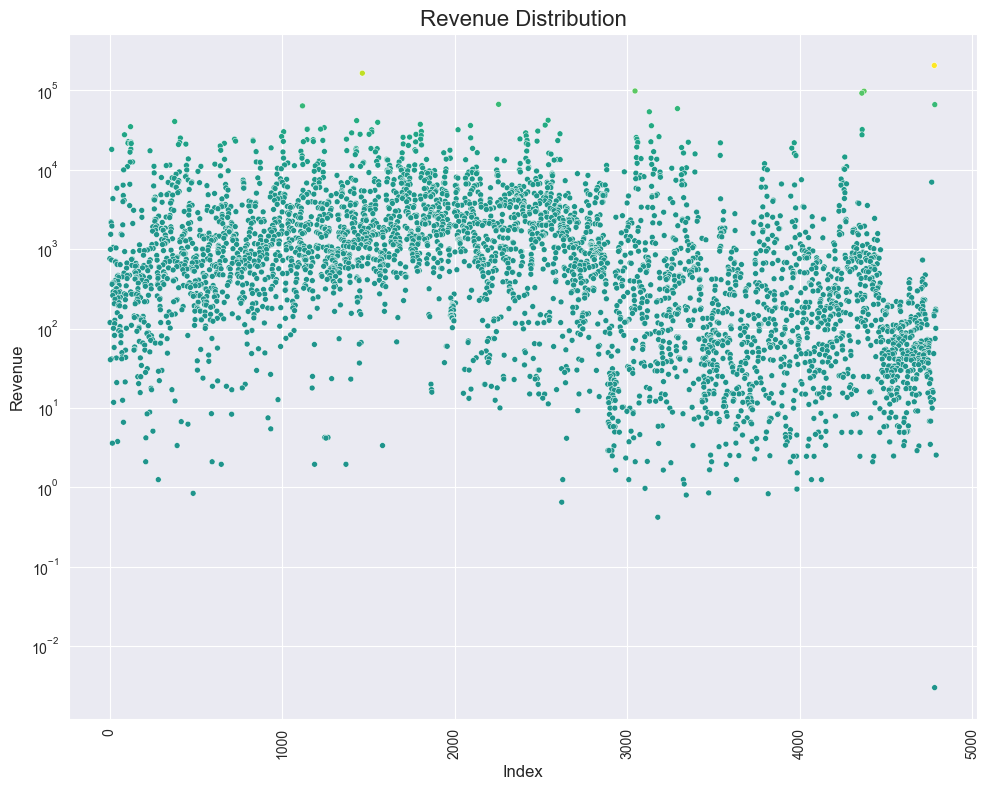

In [310]:
# scatterplot of total revenue
plt.figure(figsize=(10,8))
# Create scatter plot with customized parameters
sns.scatterplot(x=total_revenue_contributor.index, y=total_revenue_contributor['Revenue'], hue=total_revenue_contributor['Revenue'], palette='viridis', size=30, legend=None)

# Set title and labels
plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.yscale('log') # Use log scale for Y-axis to make large revenue values more defined
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Pareto Chart to Highlight Top 20 Contributors

In [311]:
# Sort by revenue in descending order and select the top 20 products

top_20_contributors = revenue_per_product.sort_values(by='Revenue', ascending=False).head(20)

# Calculate Cumulative Revenue and Cumulative Percentage
top_20_contributors['Cumulative Revenue'] = top_20_contributors['Revenue'].cumsum()
total_revenue = top_20_contributors['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")


top_20_contributors['Cumulative %'] = (top_20_contributors['Cumulative Revenue'] / total_revenue) * 100
print(top_20_contributors[['Description', 'Revenue', 'Cumulative %']])


top_20_contributors

Total Revenue: 1347612.03
                             Description    Revenue  Cumulative %
4780                      DOTCOM POSTAGE  206245.48     15.304515
1464            REGENCY CAKESTAND 3 TIER  164762.19     27.530748
3045                       PARTY BUNTING   98302.98     34.825353
4373  WHITE HANGING HEART T-LIGHT HOLDER   97715.99     42.076401
4360             JUMBO BAG RED RETROSPOT   92356.03     48.929711
2254                  RABBIT NIGHT LIGHT   66756.59     53.883406
4783                             POSTAGE   66230.64     58.798073
1117     PAPER CHAIN KIT 50'S CHRISTMAS    63791.94     63.531775
3291       ASSORTED COLOUR BIRD ORNAMENT   58959.73     67.906901
3128                       CHILLI LIGHTS   53768.06     71.896778
2541                      SPOTTY BUNTING   42065.32     75.018249
1431             JUMBO BAG PINK POLKADOT   41619.66     78.106650
376             BLACK RECORD COVER FRAME   40596.96     81.119161
1553      PICNIC BASKET WICKER 60 PIECES   39619.5

,StockCode,Description,Revenue,Cumulative Revenue,Cumulative %
4780,DOT,DOTCOM POSTAGE,206245.48,206245.48,15.304515
1464,22423,REGENCY CAKESTAND 3 TIER,164762.19,371007.67,27.530748
3045,47566,PARTY BUNTING,98302.98,469310.65,34.825353
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.99,567026.64,42.076401
4360,85099B,JUMBO BAG RED RETROSPOT,92356.03,659382.67,48.929711
2254,23084,RABBIT NIGHT LIGHT,66756.59,726139.26,53.883406
4783,POST,POSTAGE,66230.64,792369.90,58.798073
1117,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94,856161.84,63.531775
3291,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.73,915121.57,67.906901
3128,79321,CHILLI LIGHTS,53768.06,968889.63,71.896778


In [312]:
most_sold_product = revenue_per_product.sort_values(by='Revenue', ascending=False).head(1)
print(most_sold_product)


     StockCode     Description    Revenue
4780       DOT  DOTCOM POSTAGE  206245.48


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Description', ylabel='Revenue'>

Text(0, 207245.48, '206,245')

Text(1, 165762.19, '164,762')

Text(2, 99302.98, '98,303')

Text(3, 98715.99, '97,716')

Text(4, 93356.03, '92,356')

Text(5, 67756.59, '66,757')

Text(6, 67230.64, '66,231')

Text(7, 64791.94, '63,792')

Text(8, 59959.729999999996, '58,960')

Text(9, 54768.060000000005, '53,768')

Text(10, 43065.32, '42,065')

Text(11, 42619.66, '41,620')

Text(12, 41596.96, '40,597')

Text(13, 40619.5, '39,620')

Text(14, 38413.44, '37,413')

Text(15, 37565.39, '36,565')

Text(16, 37116.09, '36,116')

Text(17, 36859.27, '35,859')

Text(18, 35897.31, '34,897')

Text(19, 34969.46, '33,969')

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of Top 20 Contributors')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'DOTCOM POSTAGE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'PARTY BUNTING'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(5, 0, 'RABBIT NIGHT LIGHT'),
  Text(6, 0, 'POSTAGE'),
  Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(9, 0, 'CHILLI LIGHTS'),
  Text(10, 0, 'SPOTTY BUNTING'),
  Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(12, 0, 'BLACK RECORD COVER FRAME'),
  Text(13, 0, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(14, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(15, 0, 'DOORMAT KEEP CALM AND COME IN'),
  Text(16, 0, 'JAM MAKING SET WITH JARS'),
  Text(17, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
  Text(18, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(19, 0, 'POPCORN HOLDER')])

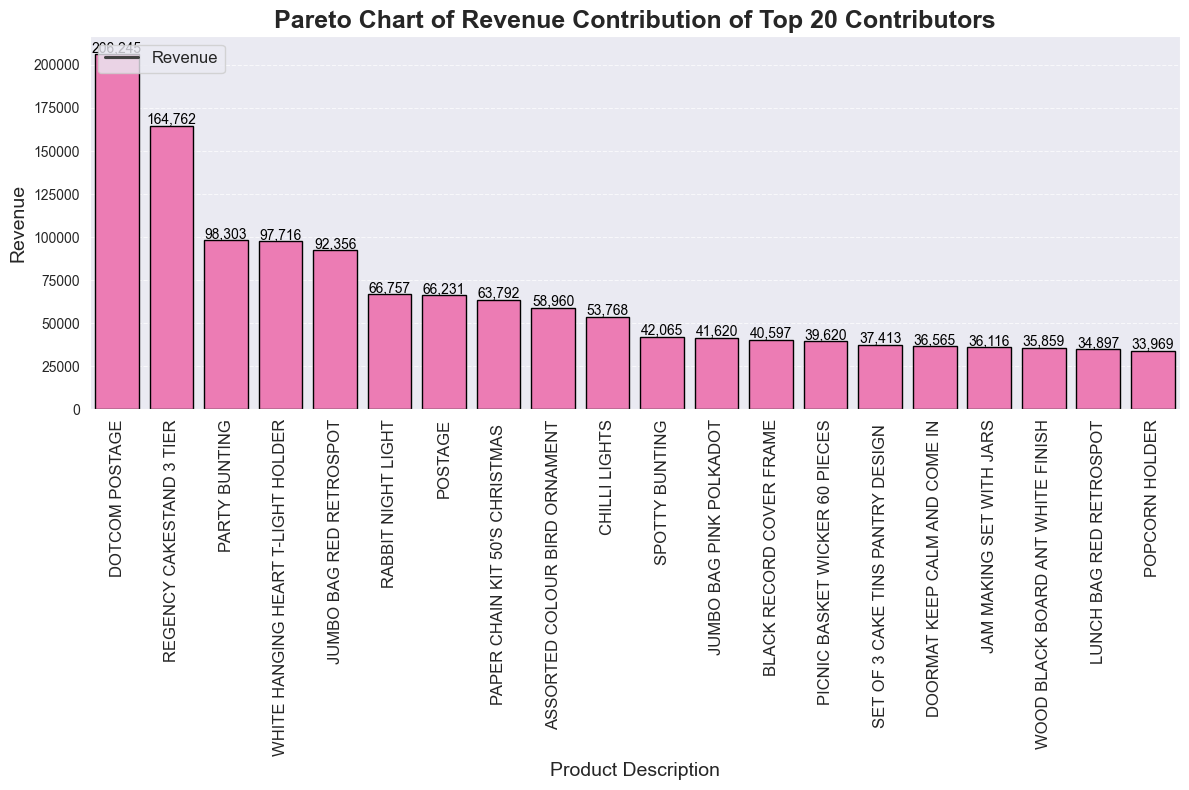

In [313]:
# Enhance the Pareto chart
plt.figure(figsize=(12, 8))

# Create a bar plot with a gradient color (based on revenue)

sns.barplot(x=top_20_contributors['Description'], y=top_20_contributors['Revenue'], color='hotpink', edgecolor = 'black',label='Revenue')
            
# Add annotations for each bar with revenue value
for i in range(len(top_20_contributors)):
    plt.text(i, top_20_contributors['Revenue'].iloc[i] + 1000, 
             f"{top_20_contributors['Revenue'].iloc[i]:,.0f}", 
             ha='center', fontsize=10, color='black')

# Set titles and labels with improved styling
plt.title('Pareto Chart of Revenue Contribution of Top 20 Contributors', fontsize=18, fontweight='bold')
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add gridlines for better visibility of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend for clarity (though in this case, it's optional)
plt.legend(['Revenue'], loc='upper left', fontsize=12)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x1000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x20b476f02d0>,
 [Text(-0.5549922638679389, 1.0639471730526568, 'DOTCOM POSTAGE'),
  Text(-1.0722522017227916, 0.24551011364224082, 'REGENCY CAKESTAND 3 TIER'),
  Text(-1.0181600688053503, -0.4163533046467684, 'PARTY BUNTING'),
  Text(-0.7299862174704593, -0.8228730900346489, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(-0.30668733131440007, -1.0563819767542664, 'JUMBO BAG RED RETROSPOT'),
  Text(0.09708821213317169, -1.0957070224584602, 'RABBIT NIGHT LIGHT'),
  Text(0.4267393680624855, -1.0138508330842515, 'POSTAGE'),
  Text(0.7099118252643863, -0.8402530573284381, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(0.9182232289296987, -0.605694726618879, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(1.0440458825370198, -0.3463642521356605, 'CHILLI LIGHTS'),
  Text(1.0948379471558438, -0.106441859564636, 'SPOTTY BUNTING'),
  Text(1.0947035103503266, 0.1078156965690643, 'JUMBO BAG PINK POLKADOT'),
  Text(1.0541192021258827, 0.3143766971476936, 'BLACK RECORD COVER FRAM

Text(0.5, 1.0, 'Revenue Contribution of Top 20 Products')

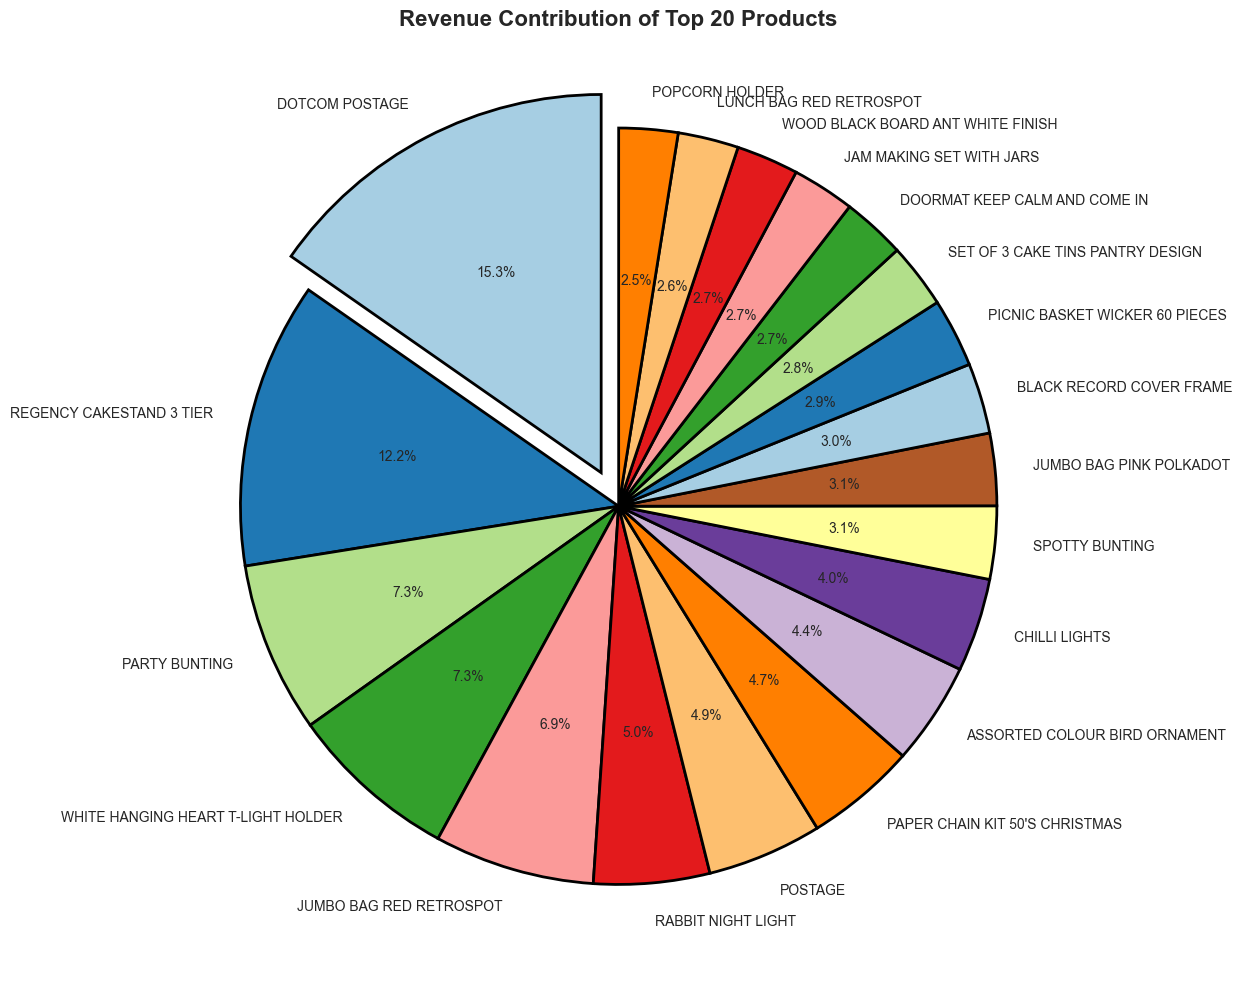

In [314]:
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(12, 10))

# Exploding the largest slice (top contributor) for emphasis
explode = [0.1 if revenue == top_20_contributors['Revenue'].max() else 0 for revenue in top_20_contributors['Revenue']]

# Plot pie chart with revenue as slices
plt.pie(top_20_contributors['Revenue'], 
        labels=top_20_contributors['Description'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors,  # Use a more appealing color palette
        explode=explode,  # Highlight the largest slice
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})  # Add edge to slices for clarity

#title and label
plt.title('Revenue Contribution of Top 20 Products', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


<Axes: xlabel='Description', ylabel='Revenue'>

Text(0, 10, '15.3%')

Text(0, 10, '27.5%')

Text(0, 10, '34.8%')

Text(0, 10, '42.1%')

Text(0, 10, '48.9%')

Text(0, 10, '53.9%')

Text(0, 10, '58.8%')

Text(0, 10, '63.5%')

Text(0, 10, '67.9%')

Text(0, 10, '71.9%')

Text(0, 10, '75.0%')

Text(0, 10, '78.1%')

Text(0, 10, '81.1%')

Text(0, 10, '84.1%')

Text(0, 10, '86.8%')

Text(0, 10, '89.5%')

Text(0, 10, '92.2%')

Text(0, 10, '94.9%')

Text(0, 10, '97.5%')

Text(0, 10, '100.0%')

Text(0, 211245.48, '206,245')

Text(1, 169762.19, '164,762')

Text(2, 103302.98, '98,303')

Text(3, 102715.99, '97,716')

Text(4, 97356.03, '92,356')

Text(5, 71756.59, '66,757')

Text(6, 71230.64, '66,231')

Text(7, 68791.94, '63,792')

Text(8, 63959.729999999996, '58,960')

Text(9, 58768.060000000005, '53,768')

Text(10, 47065.32, '42,065')

Text(11, 46619.66, '41,620')

Text(12, 45596.96, '40,597')

Text(13, 44619.5, '39,620')

Text(14, 42413.44, '37,413')

Text(15, 41565.39, '36,565')

Text(16, 41116.09, '36,116')

Text(17, 40859.27, '35,859')

Text(18, 39897.31, '34,897')

Text(19, 38969.46, '33,969')

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of Top 20 Contributors')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

Text(0, 0.5, 'Cumulative %')

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_17264\2157986887.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_20_contributors['Description'], rotation=90, fontsize=12)


[Text(0, 0, 'DOTCOM POSTAGE'),
 Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
 Text(2, 0, 'PARTY BUNTING'),
 Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
 Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
 Text(5, 0, 'RABBIT NIGHT LIGHT'),
 Text(6, 0, 'POSTAGE'),
 Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
 Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
 Text(9, 0, 'CHILLI LIGHTS'),
 Text(10, 0, 'SPOTTY BUNTING'),
 Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
 Text(12, 0, 'BLACK RECORD COVER FRAME'),
 Text(13, 0, 'PICNIC BASKET WICKER 60 PIECES'),
 Text(14, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
 Text(15, 0, 'DOORMAT KEEP CALM AND COME IN'),
 Text(16, 0, 'JAM MAKING SET WITH JARS'),
 Text(17, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
 Text(18, 0, 'LUNCH BAG RED RETROSPOT'),
 Text(19, 0, 'POPCORN HOLDER')]

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_17264\2157986887.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='center right', fontsize=12)


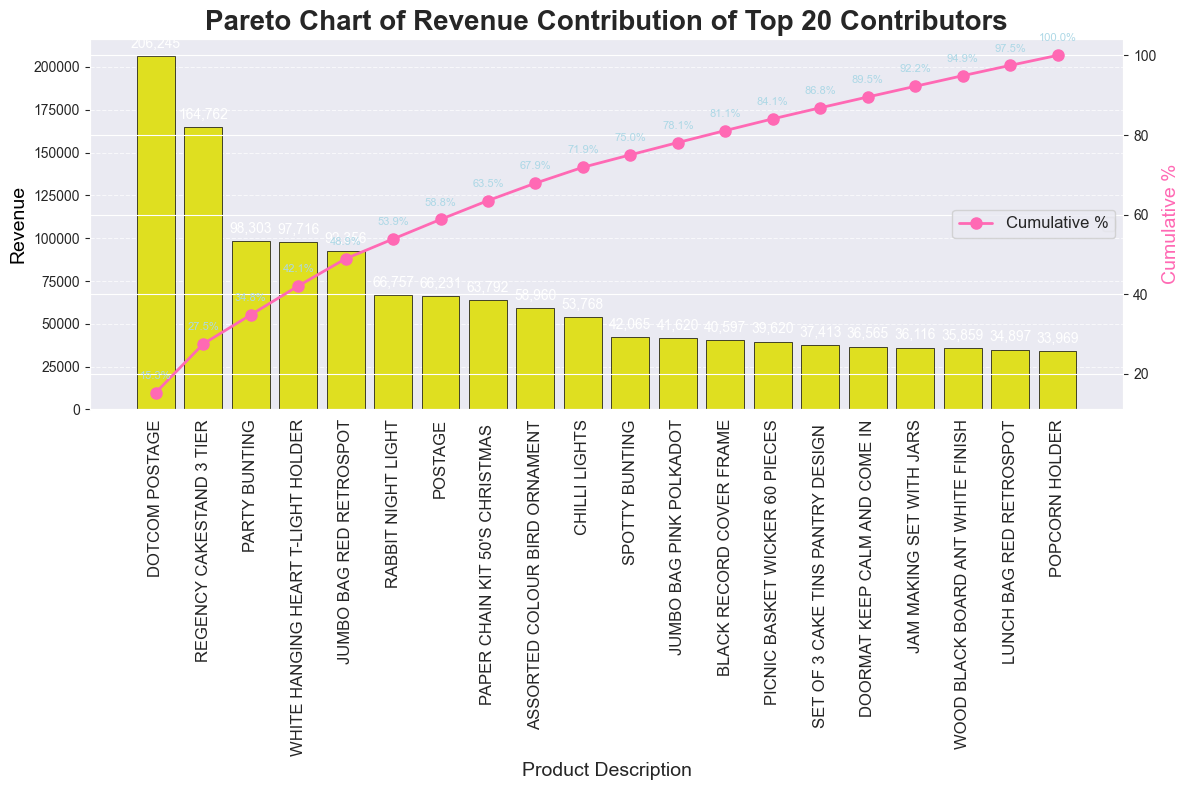

In [315]:

# Create subplots with two axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the revenue as bars on ax1 (using a color gradient for the bars)
sns.barplot(x=top_20_contributors['Description'], y=top_20_contributors['Revenue'], color='yellow',edgecolor = 'black', linewidth = 0.5)

# Plot the cumulative percentage on ax2 (second y-axis)
ax2 = ax1.twinx()
ax2.plot(top_20_contributors['Description'], top_20_contributors['Cumulative %'], color='hotpink', marker='o', linestyle='-', linewidth=2, markersize=8, label='Cumulative %')

# Labeling the cumulative percentage on the plot
for i, txt in enumerate(top_20_contributors['Cumulative %']):
    ax2.annotate(f'{txt:.1f}%', (top_20_contributors['Description'].iloc[i], top_20_contributors['Cumulative %'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='lightblue')

# Annotate the revenue values above the bars
for i, revenue in enumerate(top_20_contributors['Revenue']):
    ax1.text(i, revenue + 5000, f'{revenue:,.0f}', ha='center', fontsize=10, color='white')

# Title and labels with larger font size for readability
ax1.set_title('Pareto Chart of Revenue Contribution of Top 20 Contributors', fontsize=20, fontweight='bold')
ax1.set_xlabel('Product Description', fontsize=14)
ax1.set_ylabel('Revenue', color='black', fontsize=14)
ax2.set_ylabel('Cumulative %', color='hotpink', fontsize=14)

# Customize the x-axis labels and rotate them for better readability
ax1.set_xticklabels(top_20_contributors['Description'], rotation=90, fontsize=12)

# Add gridlines for the revenue axis (light lines for clarity)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends for both axes
ax1.legend(loc='center right', fontsize=12)
ax2.legend(loc='center right', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Description'>

Text(0.5, 1.0, 'Revenue Contribution Heatmap of Top 20 Products')

Text(0.5, 36.72222222222221, 'Product')

Text(70.7222222222222, 0.5, 'Revenue')

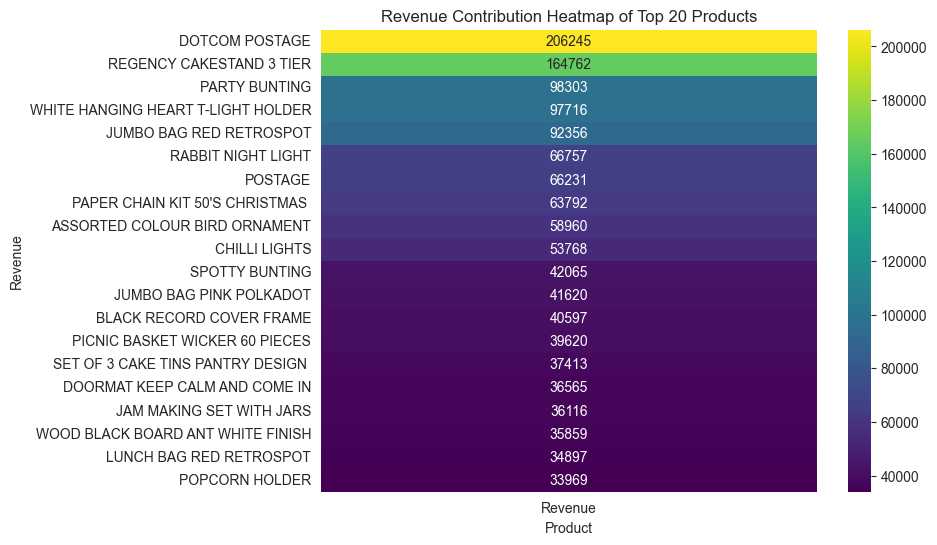

In [316]:
#heatmap 

# Step 1: Create a pivot table if needed (for row/column organization)
# If data is already in a 2D format, this step can be skipped
pareto_pivot = top_20_contributors

# Step 2: Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pareto_pivot.set_index('Description')['Revenue'].to_frame(), annot=True, fmt=".0f", cmap="viridis")
plt.title("Revenue Contribution Heatmap of Top 20 Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()




 ## Product Segmentation 
 ### based on sales volume, revenue, and daily sales trends using clustering techniques (K-Means)

In [317]:
# Aggregate Sales Data by Product
# Add new columns for sales and revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.date

# Convert InvoiceDate to datetime format
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Create a revenue column

# Group by Product
product_data = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'InvoiceDate': lambda x: (x.max() - x.min()).days  # Proxy for sales frequency
}).reset_index()

product_data.rename(columns={'InvoiceDate': 'SalesPeriodDays'}, inplace=True)

product_data.reset_index(inplace=True)

# Display the first few rows of the aggregated data
print(product_data.head())


   index StockCode  Quantity  Revenue  SalesPeriodDays
0      0     10002      1037   759.89              148
1      1     10080       495   119.09              267
2      2     10120       193    40.53              366
3      3     10125      1296   994.84              372
4      4     10133      2775  1540.02              350


In [318]:
# Feature scaling

scaler = StandardScaler()
features = ['Quantity', 'Revenue', 'SalesPeriodDays']
scaled_features = scaler.fit_transform(product_data[features])


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

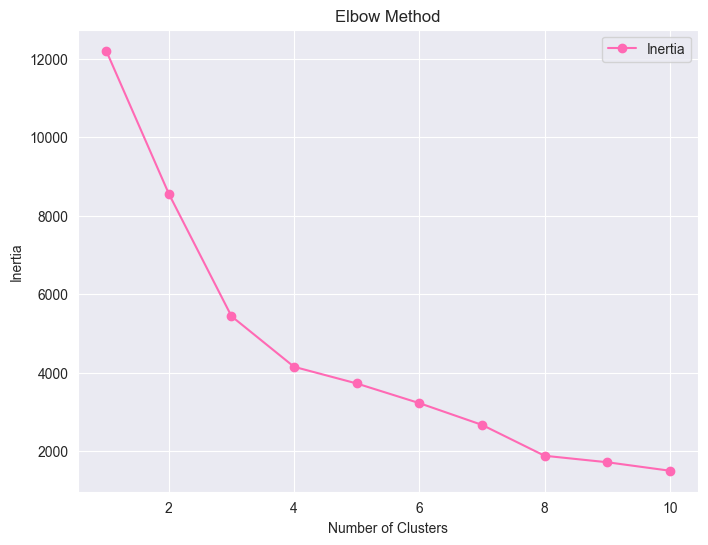

In [319]:
# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color = 'hotpink', label='Inertia')
plt.legend(loc='upper right')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [320]:
# Apply K-Means Clustering

# Choose optimal number of clusters (based on elbow method)
optimal_k = 3  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
product_data['Cluster'] = kmeans.fit_predict(scaled_features)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, '2D Scatter Plot of Clusters')

Text(0.5, 0, 'PCA1')

Text(0, 0.5, 'PCA2')

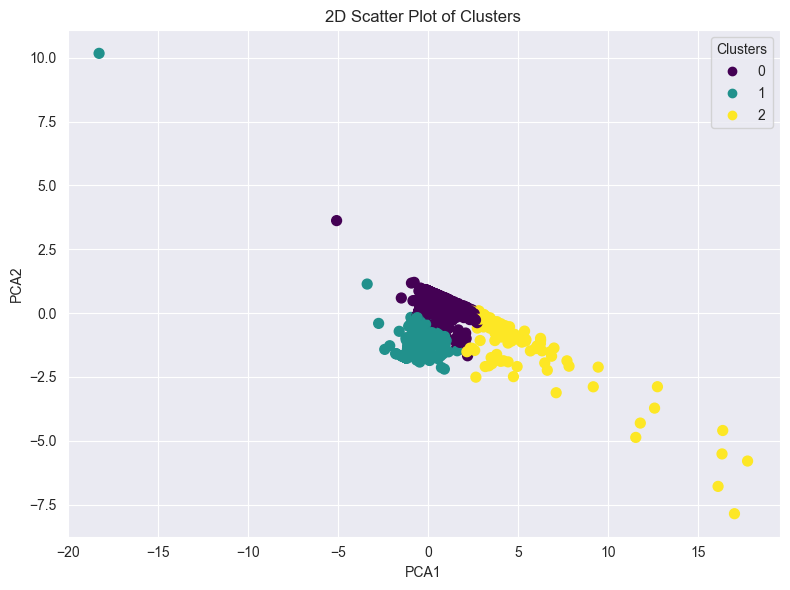

In [321]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create the 2D scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=product_data['Cluster'], cmap='viridis', s=50)

# Add a color legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Set titles and labels
plt.title('2D Scatter Plot of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Daily Sales Trends by Cluster')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Quantity')

<Figure size 1200x600 with 0 Axes>

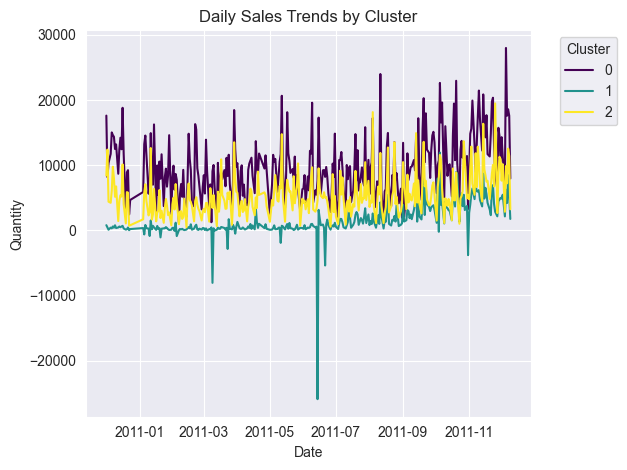

In [322]:
# Time Series Map (aggregated daily sales trends)
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby(['Date', 'StockCode'])['Quantity'].sum().reset_index()

daily_sales['Cluster'] = daily_sales['StockCode'].map(
    dict(product_data[['StockCode', 'Cluster']].values)
)

cluster_trends = daily_sales.groupby(['Date', 'Cluster'])['Quantity'].sum().unstack()

plt.figure(figsize=(12, 6))
cluster_trends.plot(kind='line', colormap='viridis')
plt.title('Daily Sales Trends by Cluster')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Here’s what each graph represents for your thesis:

1. Elbow Method Plot
Purpose: Determines the optimal number of clusters for K-Means.
Description: The graph shows the "inertia" (sum of squared distances between data points and their cluster centroids) for different numbers of clusters (K). The "elbow point" indicates where adding more clusters results in diminishing returns in reducing inertia.
Thesis Insight: Helps justify the choice of the number of clusters for segmentation, ensuring meaningful groupings without overfitting.
2. 3D Scatter Plot of Clusters
Purpose: Visualizes the segmented product clusters in a 3D space.
Description: Uses Principal Component Analysis (PCA) to reduce the dataset to three dimensions, making it possible to plot and interpret high-dimensional clustering results. Each point represents a product, color-coded by its assigned cluster.
Thesis Insight: Demonstrates clear separation between clusters, indicating distinct groups of products based on their sales volume, revenue, and sales trends.
3. Heatmap of Cluster Characteristics
Purpose: Highlights the differences between clusters based on average feature values.
Description: The heatmap shows the average Quantity, Revenue, and SalesPeriodDays for each cluster, providing insights into the characteristics of products in each group.
Thesis Insight: Enables interpretation of cluster profiles (e.g., high-revenue vs. low-revenue products, frequent vs. infrequent sales), which is critical for actionable segmentation strategies.
4. Time Series Map of Daily Sales Trends
Purpose: Tracks how sales quantity changes over time for each cluster.
Description: A line graph showing aggregated daily sales for products in each cluster, providing temporal insights into their performance.
Thesis Insight: Identifies clusters with stable, seasonal, or volatile sales patterns, which can guide inventory and marketing decisions.
Summary for Thesis
Each visualization serves a unique role in understanding the segmentation:

The Elbow Method determines the cluster count.
The 3D Scatter Plot visualizes cluster distribution.
The Heatmap explains cluster characteristics.
The Time Series Map reveals temporal sales trends within clusters.
Together, these graphs provide a comprehensive view of product segmentation, supporting strategic decisions based on distinct product groups.






